# Using all the features of the dataset predict the charge

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
df = pd.read_csv('/Users/kirtan/Downloads/insurance.csv')

In [3]:
#Top 5 values of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Number of columns and rows of Dataset
df.shape

(1338, 7)

In [5]:
# Display information about the DataFrame, including column names, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Converting bmi column into int
df['bmi'] = df['bmi'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   int64  
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [8]:
#Checking for the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#Checking for unique values in region column
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
#Checking for unique values in smoker column
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

Text(0, 0.5, 'Charges')

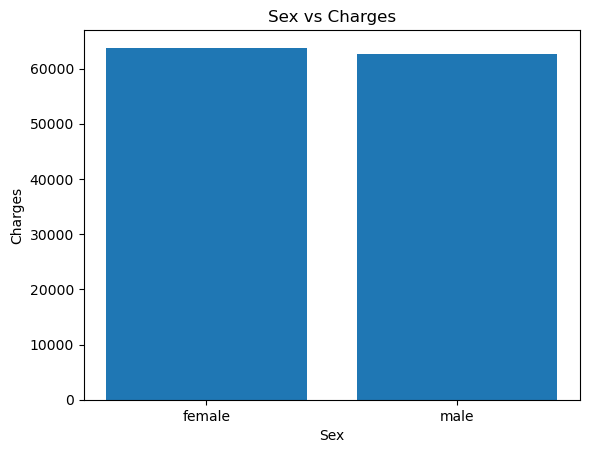

In [11]:
#Creating a bar graph of Sex vs Charges
plt.bar(df['sex'],df['charges'])
plt.title('Sex vs Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')

Text(0.5, 1.0, 'Sex vs Charges')

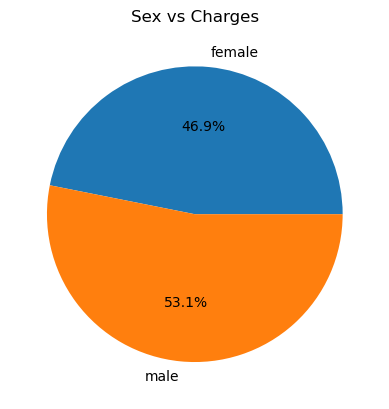

In [12]:
# Calculate the total charges for each sex
charges_by_sex = df.groupby('sex')['charges'].sum()

# Create the pie chart
plt.pie(charges_by_sex, labels=charges_by_sex.index, autopct='%1.1f%%')
plt.title('Sex vs Charges')

Text(0, 0.5, 'Charges')

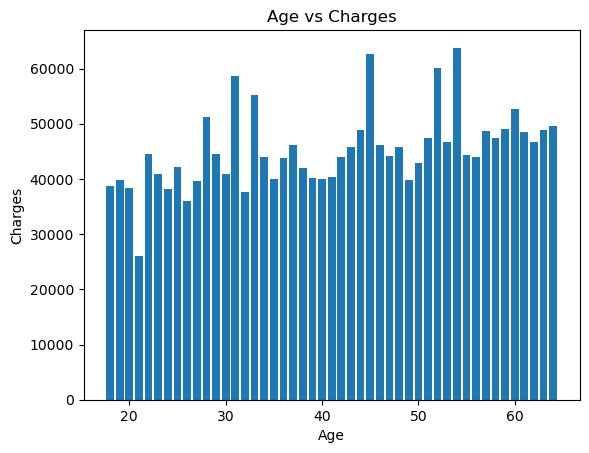

In [13]:
#Creating a bar graph of age vs Charges
plt.bar(df['age'],df['charges'])
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

Text(0.5, 1.0, 'Region vs Charges')

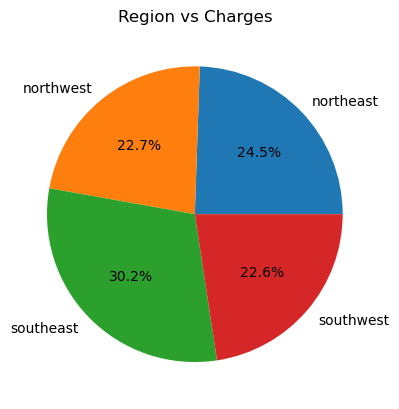

In [14]:
# Calculate the total charges for each region
charges_by_region = df.groupby('region')['charges'].sum()

# Create the pie chart
plt.pie(charges_by_region, labels=charges_by_region.index, autopct='%1.1f%%')
plt.title('Region vs Charges')

Text(0, 0.5, 'Charges')

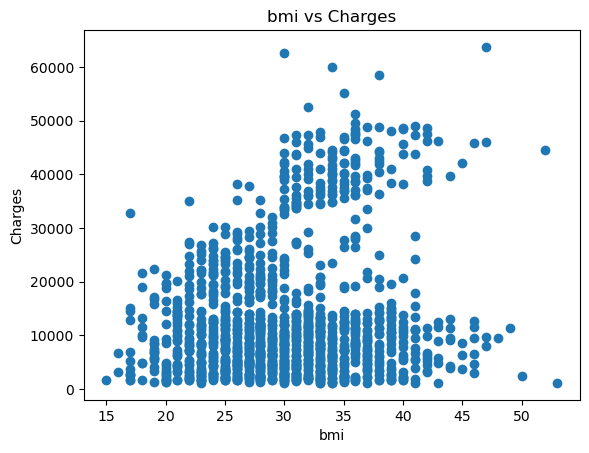

In [15]:
#Creating a bar graph of bmi vs Charges
plt.scatter(df['bmi'],df['charges'])
plt.title('bmi vs Charges')
plt.xlabel('bmi')
plt.ylabel('Charges')

# Converting Categorical variable into numeric values
->Converting Sex column & Smoker column using Label Encoder

->Converting Region column using One Hot Encoder

In [16]:
#Importing LabelEncoder & OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
#Creating Objects of LabelEncoder & OneHotEncoder
Le = LabelEncoder()
OHE = OneHotEncoder(sparse=False, drop='first')

# LabelEncoder

In [18]:
df['smoker'] = Le.fit_transform(df['smoker'])

In [19]:
df['sex'] = Le.fit_transform(df['sex'])

# OneHotEncoder

In [20]:
encoded_features = OHE.fit_transform(df[['region']])

In [21]:
new_columns = OHE.get_feature_names(['education'])
print(new_columns)

['education_northwest' 'education_southeast' 'education_southwest']


/Users/kirtan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
# Create a new DataFrame with the encoded features
df_encoded = pd.DataFrame(encoded_features, columns=new_columns) 

In [23]:
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df,df_encoded],axis=1)

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges,education_northwest,education_southeast,education_southwest
0,19,0,27,0,1,southwest,16884.92400,0.0,0.0,1.0
1,18,1,33,1,0,southeast,1725.55230,0.0,1.0,0.0
2,28,1,33,3,0,southeast,4449.46200,0.0,1.0,0.0
3,33,1,22,0,0,northwest,21984.47061,1.0,0.0,0.0
4,32,1,28,0,0,northwest,3866.85520,1.0,0.0,0.0


In [25]:
df.drop(columns='region',axis=1,inplace=True)

In [26]:
df.head()

,age,sex,bmi,children,smoker,charges,education_northwest,education_southeast,education_southwest
0,19,0,27,0,1,16884.92400,0.0,0.0,1.0
1,18,1,33,1,0,1725.55230,0.0,1.0,0.0
2,28,1,33,3,0,4449.46200,0.0,1.0,0.0
3,33,1,22,0,0,21984.47061,1.0,0.0,0.0
4,32,1,28,0,0,3866.85520,1.0,0.0,0.0


In [27]:
#Checking the name of the total columns present in df
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'education_northwest', 'education_southeast', 'education_southwest'],
      dtype='object')

# Creating the independent variable(X) and dependent variable(y)

In [28]:
# Extract features (X) and target variable (y)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'education_northwest', 'education_southeast', 'education_southwest']]
y = df['charges']

In [29]:
# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Splitting the data set into train and test using train_test_split from sklearn.model_selection

In [30]:
from sklearn.model_selection import train_test_split

Creating X_train,X_test,y_train and y_test we will set test_size = 0.2 so 20% of the actual data will be used as test data

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
print('X_train_shape: ',X_train.shape)
print('y_train_shape: ',y_train.shape)
print('X_test_shape: ',X_test.shape)
print('y_test_shape: ',y_test.shape)

X_train_shape:  (1070, 8)
y_train_shape:  (1070,)
X_test_shape:  (268, 8)
y_test_shape:  (268,)


# Standardising the data using StandardScaler

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
#Creating the object of StandardScaler
SD = StandardScaler()

In [36]:
X_train_SD = SD.fit_transform(X_train)

In [37]:
X_test_SD = SD.transform(X_test)

In [38]:
X_mean = X_train_SD.mean(axis=0)

In [39]:
y_mean = y_train.mean(axis=0)

In [40]:
num = 0
dim = 0
epsilon = 1e-8  
for i in range(len(X_train_SD)):
    num += (X_train_SD[i] - X_mean) * (y_train[i] - y_mean)
    dim += (X_train_SD[i] - X_mean) ** 2

coff = num / (dim + epsilon)
inter = y_mean - (coff * X_mean)
print('Coff:', coff)
print('Intercept:', inter)

Coff: [3741.07883706  441.19207154 2171.88150013 1008.00169753 9362.70498353
 -477.70510637  806.26463259 -574.48668102]
Intercept: [13023.82592071 13023.82592071 13023.82592071 13023.82592071
 13023.82592071 13023.82592071 13023.82592071 13023.82592071]


In [41]:
m = coff
c = inter
y = m * 11 + c
z = m * 95644.50 + c
print('y:', y)
print('z:', z)

y: [ 54175.69312841  17876.9387077   36914.52242213  24111.84459358
 116013.58073953   7769.06975068  21892.73687925   6704.47242953]
z: [ 3.57826639e+08  4.22106189e+07  2.07741544e+08  9.64228422e+07
  8.95504261e+08 -4.56768422e+07  7.71278015e+07 -5.49334675e+07]


In [42]:
# Evaluate the model on the test set
y_pred = X_test_SD.dot(coff)
mse = np.mean((y_pred - y_test) ** 2)
mae = np.mean(np.abs(y_pred - y_test))
r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - y_test.mean()) ** 2))

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared:', r2)

Mean Squared Error (MSE): 236204655.52704588
Mean Absolute Error (MAE): 13935.893054169248
R-squared: -0.5015624562010752


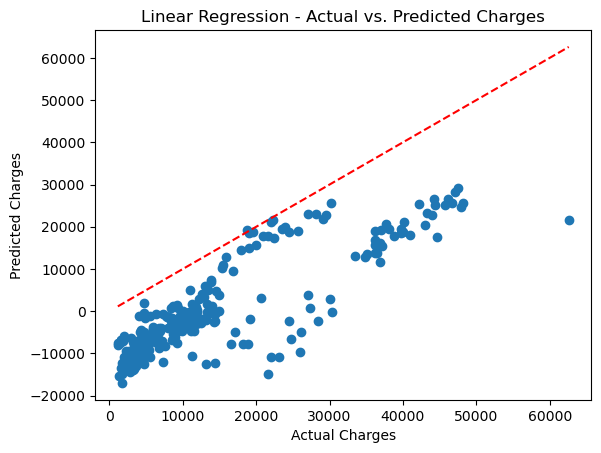

In [43]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression - Actual vs. Predicted Charges')
plt.show()